Section C : Polynomial Regression

Data_Info:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
DataType:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object
Rows and Columns:
(1338, 7)
Column_Name:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
Missing_Value:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64
Basic_Calculations:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960

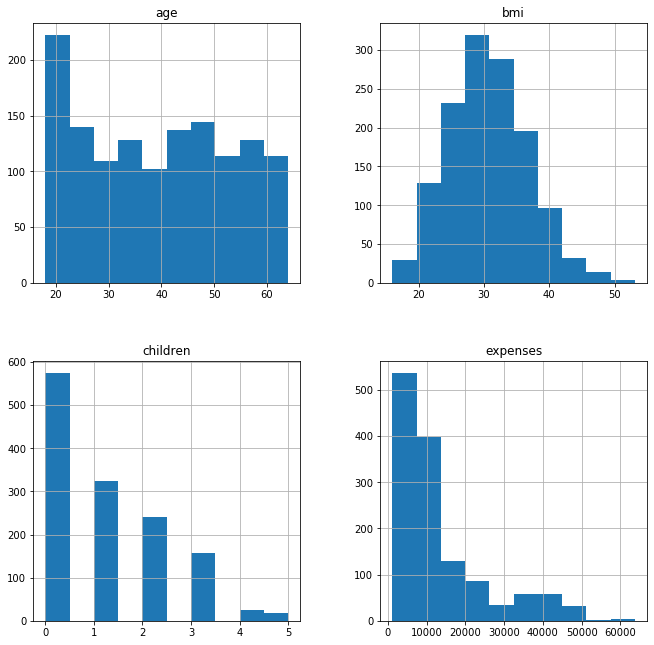

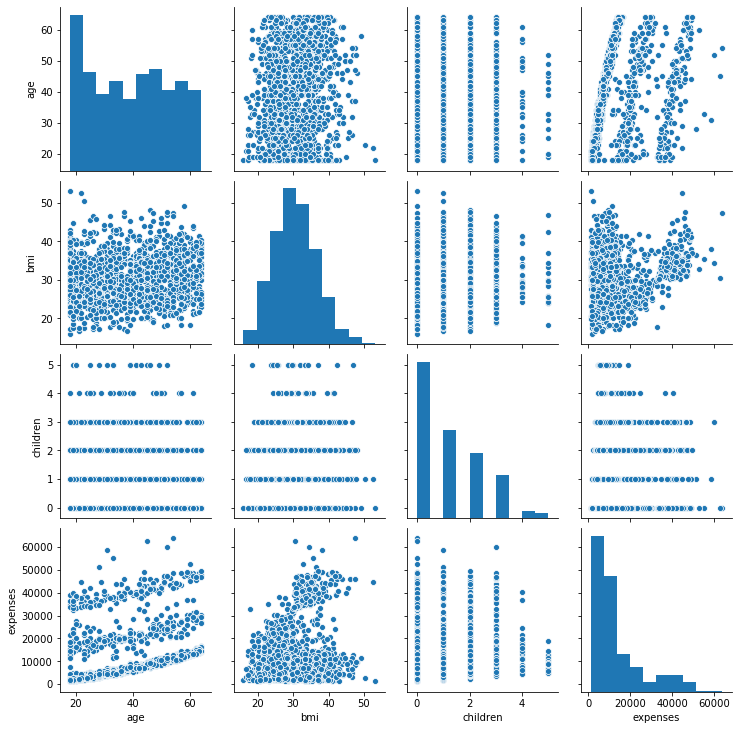

In [2]:
# for better understanding please follow section A & B of Regression Result
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

# importing data set
df = pd.read_csv(r'D:\Learn\Project\Insurance\insurance.csv')

# for imported dataset here we are going to extract some information about data

def Initial_Analysis(data):
    print("Data_Info:")
    print(data.head())
    print("DataType:")
    print(data.dtypes)
    print("Rows and Columns:")
    print(data.shape)
    print("Column_Name:")
    print(data.columns)
    print("Missing_Value:")
    print(data.isnull().sum())
    print("Basic_Calculations:")
    print(data.describe())

#here we are going to call our first function for analysis
Initial_Analysis(df)

# from this step we are going to know that :-
# 1. expenses is our dependent variable
# 2. Except expenses rest all are independent variable
# 3. There are three type of variable int, float, object
# 4. there is no missing value

# we are going visualize data for int and float

df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

# Also with the help of Pair plot we are going to see that how variable relates to each other
sns.pairplot(df)

# Now its time to separate data into Numerical and Categorical variable
# While doing this we are going to preserve original dataset

data = df.copy()

Num_var = data.select_dtypes(include  = np.number).columns
Cat_var = data.select_dtypes(exclude = np.number).columns

for feature in Cat_var:
    print(len(data[feature].unique()))
    
# so now we are performing some operation over Cat_var as we have some categorical features to convert it into Num_var
# for this we will use LableEncoder
# all these operation we apply over data to make model general

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in Cat_var:
    if i != 'region':
        data[i] = LE.fit_transform(data[i])

# here we have converted only those categorgy which have max two categorgy
# for category which have more than two category we will use dummy variable 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',
                                        OneHotEncoder(drop='first'), [5])],
                                        remainder = 'passthrough')
dataset = ct.fit_transform(data)

In [3]:
# Now we will apply polynomial regression to compaire with Linear_reg.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error



In [9]:
def Polynomial_Regression(df):
    X = df[:, 0:-1]
    y = df[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
        
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    poly = PolynomialFeatures(degree =2)
    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    
    print('************************')
    
    print("Intercept : ", model.intercept_)
    print("Slope : ", model.coef_)
    
    
    print('************************')
    print("Intercept : ", model_poly.intercept_)
    print("Slope : ", model_poly.coef_)
    
    poly_predict = model_poly.predict(X_poly_test)
    reg_predict = model.predict(X_test)
    
    
    print("poly_predict : ",r2_score(y_test,poly_predict))
    print("reg_predict  : ",r2_score(y_test,reg_predict))
    print('************************')
  

    print("MAE")
    print("Poly : ",mean_absolute_error(y_test,poly_predict))
    print("Reg  : ",mean_absolute_error(y_test,reg_predict))
    print('************************')
    
    print("MSE")
    print("Poly : ",mean_squared_error(y_test,poly_predict))
    print("Reg  : ",mean_squared_error(y_test,reg_predict))
    print('************************')
    
    print("RMSE")
    print("Poly : ",np.sqrt(mean_squared_error(y_test,poly_predict)))
    print("Reg  : ",np.sqrt(mean_squared_error(y_test,reg_predict)))
    print('************************')
    
    print("MAPE - Mean Absolute Percentage Error")
    y_test, poly_predict = np.array(y_test), np.array(poly_predict)
    print(np.mean(np.abs((y_test - poly_predict) / y_test)) * 100)
    print("Mape - Train:" , np.mean(np.abs((y_test,poly_predict))))
    print("Mape - Test:" ,np.mean(np.abs((y_test,reg_predict))))
    print('************************')
    
    plt.figure(figsize=(10,7))
    plt.title("Actual vs. predicted",fontsize=25)
    plt.xlabel("Actual",fontsize=18)
    plt.ylabel("Predicted", fontsize=18)
    plt.scatter(x=y_test,y=reg_predict)

    plt.figure(figsize=(10,7))
    plt.title("Actual vs. predicted",fontsize=25)
    plt.xlabel("Actual",fontsize=18)
    plt.ylabel("Predicted", fontsize=18)
    plt.scatter(x=y_test,y=poly_predict)

In [5]:
# here for better understanding we compare with linear regression instead of training dataset
# here we will see the magic of Polinomail Regression

************************
Intercept :  -11541.138807182775
Slope :  [-1.92692549e+02 -1.08080506e+03 -8.67813467e+02  2.50125351e+02
  1.29327723e+01  3.33367988e+02  4.42435048e+02  2.36558265e+04]
************************
Intercept :  -4413.177944403251
Slope :  [ 3.45769794e-08 -1.36408642e+03  4.29276052e+02  4.20585488e+01
 -3.61373349e+01 -1.00303518e+03  5.20699013e+02  9.01232284e+02
 -9.76011224e+03 -1.36408642e+03  3.27418093e-11 -6.49720278e-11
  1.63027438e+01  1.50634053e+03  2.32508070e+01  1.41155121e+02
 -2.09893537e+02  4.29276052e+02 -3.86535248e-12  4.33902369e+01
  1.28112853e+03 -1.24158951e+02 -4.35874998e+02 -4.54696083e+02
  4.20585488e+01  4.95498103e+01  8.37075007e+02 -1.09562940e+02
 -5.79629126e+02  8.17216694e+02  2.99616280e+00  1.01654012e+01
  8.30941519e-01  6.29557118e-01  7.00789603e+00 -1.00303518e+03
  2.68222934e+01 -3.34191625e+02 -7.26155921e+02 -7.94232194e+00
  1.76423036e+01  1.43733448e+03 -8.72138486e+01 -4.87880290e+02
 -9.76011224e+03]
pol

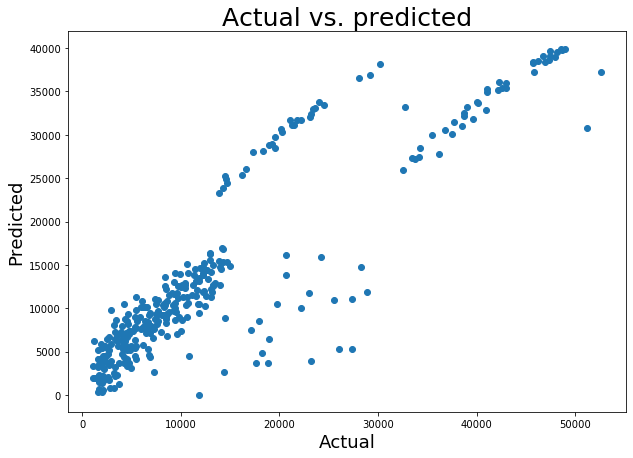

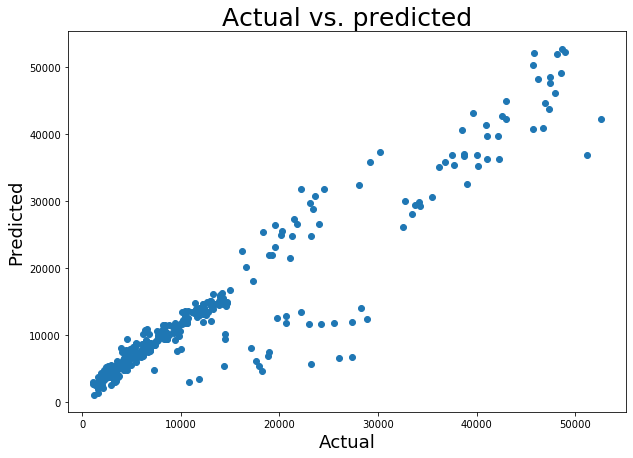

In [10]:
Polynomial_Regression(dataset)

In [ ]:
# Here we saw that result of poly_predict is far better than linear regression
# final we will compare with OLS

In [11]:
import statsmodels.api as sm
result = sm.OLS(endog = dataset[:, -1], exog = dataset[:, 0:-1]).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Sun, 10 May 2020   Prob (F-statistic):                        0.00
Time:                        11:23:26   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# as of now Polynomial is our good model.
# lets wait for next model and some parameter tuning.